# Plot the RCA data lengths figure

In [31]:
import pandas as pd 
import numpy as np 
import pickle
import os
import glob
from os.path import join, basename, dirname
import warnings
# turn off all warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt


# set latex font
import matplotlib
from matplotlib import rc
rc_fonts = {
    "font.family": "serif",
    "font.size": 12,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
# 'text.latex.preview': True,
matplotlib.rcParams.update(rc_fonts)

rc("text", usetex=True)

In [32]:
# setting pandas print full rows
pd.set_option('display.max_rows', None)

In [33]:
def get_val_diff_lengths(dataset):
    methods = []
    for report_path in glob.glob(".ar/ase-output/output-rca-various-length/**/*.xlsx", recursive=True):
        if f"_{dataset}_" not in report_path: continue        
        dir_name = basename(dirname(dirname(report_path)))
        try:
            # output_online-boutique_nsigma_ad0_l3
            _, d, method, delay, length = dir_name.split("_")
        except:
            # output_online-boutique_fci_randomwalk_ad0_l4
            _, d, m1, m2, delay, length = dir_name.split("_")
            method = f"{m1}-{m2}"

        delay = int(delay[2:]) 
        # length = length[1:]
        if delay != 0:
            methods.append(f"{method}_{delay}")
        else:
            methods.append(method)

    methods = list(set(methods))

    data = {
        m: []  # each item is a tuple of: (length, top1, top3, avg5)
        for m in methods
    }    
    for report_path in glob.glob(".ar/ase-output/output-rca-various-length/**/*.xlsx", recursive=True):
        if f"_{dataset}_" not in report_path: continue
        
        dir_name = basename(dirname(dirname(report_path)))

        try:
            # output_online-boutique_nsigma_ad0_l3
            _, d, method, delay, length = dir_name.split("_")            
        except:
            # output_online-boutique_fci_randomwalk_ad0_l4
            _, d, m1, m2, delay, length = dir_name.split("_")
            method = f"{m1}-{m2}"
            
        delay = int(delay[2:]) 
        length = int(length[1:])
        if delay != 0:
            method = f"{method}_{delay}"
        
        report_data = pd.read_excel(report_path, engine='openpyxl')
    
        # read top_1_service value at last row
        if "circa10" not in report_path and "rcd10" not in report_path and "rcd50" not in report_path and "circa50" not in report_path:
            avg5 = report_data["avg@5_service"].iloc[-1]
        else:
            avg5 = report_data["avg@5_metric"].iloc[-1]
        
        data[method].append((length, avg5))
    
    # sort by length
    for method in methods:
        data[method] = sorted(data[method], key=lambda x: x[0])
    avg5_dict = {
        method: [x[1] for x in data[method]]
        for method in methods
    }
    return avg5_dict
avg5_rcd50 = get_val_diff_lengths("rcd50")
print(avg5_rcd50)

{'nsigma': [0.05800000000000001, 0.062, 0.048, 0.044, 0.052, 0.05600000000000001, 0.046, 0.042, 0.062, 0.066], 'rcd_60': [0.0774, 0.0318, 0.0712, 0.08779999999999999, 0.1198, 0.1436, 0.1528, 0.1848, 0.1784, 0.2104], 'nsigma_60': [0.028, 0.05400000000000001, 0.066, 0.066, 0.044, 0.046, 0.044, 0.038, 0.028, 0.032], 'pc-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'causalrca': [0.07039999999999999, 0.05640000000000001, 0.034, 0.0368, 0.0396, 0.0396, 0.0396, 0.04, 0.04, 0.0396], 'lingam-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'circa_60': [0.066, 0.062, 0.072, 0.048, 0.08, 0.072, 0.05, 0.07, 0.048, 0.092], 'fci-pagerank': [0.068, 0.05400000000000001, 0.068, 0.018, 0.072, 0.058, 0.044, 0.07, 0.058, 0.044], 'fci-randomwalk': [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04], 'circa': [0.06599999999999999, 0.048, 0.1, 0.06999999999999999, 0.06, 0.07, 0.096, 0.04, 0.034, 0.082], 'fges-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [34]:
def get_val_diff_lengths_ss2(dataset):
    methods = []
    for report_path in glob.glob("./output-tmp/**/new_report.xlsx", recursive=True):
        if f"_{dataset}_" not in report_path: continue        
        dir_name = basename(dirname(dirname(report_path)))
        try:
            # output_online-boutique_nsigma_ad0_l3
            _, d, method, delay, length = dir_name.split("_")
        except:
            # output_online-boutique_fci_randomwalk_ad0_l4
            _, d, m1, m2, delay, length = dir_name.split("_")
            method = f"{m1}-{m2}"

        delay = int(delay[2:]) 
        # length = length[1:]
        if delay != 0:
            methods.append(f"{method}_{delay}")
        else:
            methods.append(method)

    methods = list(set(methods))

    data = {
        m: []  # each item is a tuple of: (length, top1, top3, avg5)
        for m in methods
    }    
    for report_path in glob.glob("./output-tmp/**/new_report.xlsx", recursive=True):
        if f"_{dataset}_" not in report_path: continue
        
        dir_name = basename(dirname(dirname(report_path)))

        try:
            # output_online-boutique_nsigma_ad0_l3
            _, d, method, delay, length = dir_name.split("_")            
        except:
            # output_online-boutique_fci_randomwalk_ad0_l4
            _, d, m1, m2, delay, length = dir_name.split("_")
            method = f"{m1}-{m2}"
            
        delay = int(delay[2:]) 
        length = int(length[1:])
        if delay != 0:
            method = f"{method}_{delay}"
        
        # print(f"{d=}, {method=}, {length=}")
    
        report_data = pd.read_excel(report_path, engine='openpyxl')
    
        # read top_1_service value at last row
        if "circa10" not in report_path and "rcd10" not in report_path and "rcd50" not in report_path and "circa50" not in report_path:
            avg5 = report_data["avg@5_service"].iloc[-1]
        else:
            avg5 = report_data["avg@5_metric"].iloc[-1]
        
        data[method].append((length, avg5))
    
    # print(len(data["nsigma"]))
        
    # sort by length
    for method in methods:
        data[method] = sorted(data[method], key=lambda x: x[0])
    avg5_dict = {
        method: [x[1] for x in data[method]]
        for method in methods
    }
    return avg5_dict
avg5_ss2 = get_val_diff_lengths_ss2("my-sock-shop")
print(avg5_rcd50)

{'nsigma': [0.05800000000000001, 0.062, 0.048, 0.044, 0.052, 0.05600000000000001, 0.046, 0.042, 0.062, 0.066], 'rcd_60': [0.0774, 0.0318, 0.0712, 0.08779999999999999, 0.1198, 0.1436, 0.1528, 0.1848, 0.1784, 0.2104], 'nsigma_60': [0.028, 0.05400000000000001, 0.066, 0.066, 0.044, 0.046, 0.044, 0.038, 0.028, 0.032], 'pc-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'causalrca': [0.07039999999999999, 0.05640000000000001, 0.034, 0.0368, 0.0396, 0.0396, 0.0396, 0.04, 0.04, 0.0396], 'lingam-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'circa_60': [0.066, 0.062, 0.072, 0.048, 0.08, 0.072, 0.05, 0.07, 0.048, 0.092], 'fci-pagerank': [0.068, 0.05400000000000001, 0.068, 0.018, 0.072, 0.058, 0.044, 0.07, 0.058, 0.044], 'fci-randomwalk': [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04], 'circa': [0.06599999999999999, 0.048, 0.1, 0.06999999999999999, 0.06, 0.07, 0.096, 0.04, 0.034, 0.082], 'fges-randomwalk': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [35]:
avg5_ss2 = avg5_mss

In [36]:
avg5_ob = get_val_diff_lengths("online-boutique")
avg5_ss1 = get_val_diff_lengths("sock-shop")
avg5_nss = get_val_diff_lengths("new-sock-shop")
avg5_mss = get_val_diff_lengths("my-sock-shop")
avg5_tt = get_val_diff_lengths("train-ticket")
avg5_circa10 = get_val_diff_lengths("circa10")
avg5_circa50 = get_val_diff_lengths("circa50")
avg5_rcd10 = get_val_diff_lengths("rcd10")
avg5_rcd50 = get_val_diff_lengths("rcd50")

In [37]:
i = list(map(str, range(60, 660, 60)))
i

['60', '120', '180', '240', '300', '360', '420', '480', '540', '600']

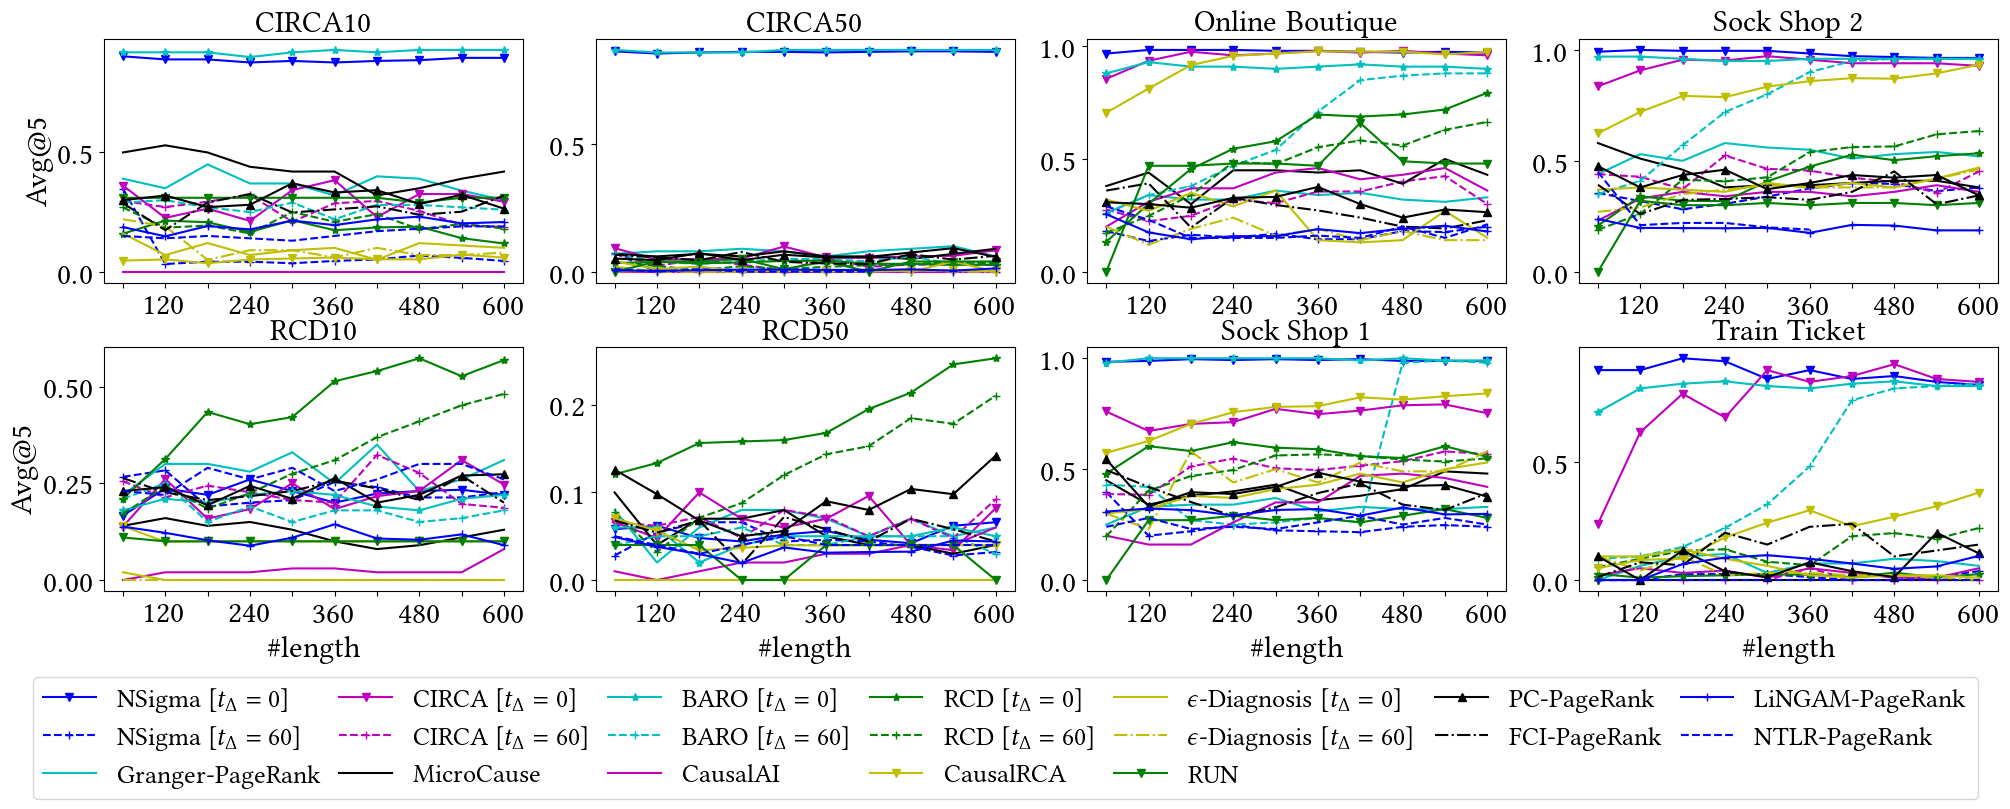

In [125]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20, 6.5))
plt.tight_layout(pad=2)

# i = list(map(str, range(60, 660, 60)))
# i = ['60', '120', '180', '240', '300', '360', '420', '480', '540', '600']
i = [' ', '120', '  ', '240', '   ', '360', '    ', '480', '     ', '600']

fontsize=22

STYLE_NSIGMA="b-v"
STYLE_NSIGMA_60="b--+"
STYLE_CIRCA="m-v"
STYLE_CIRCA_60="m--+"
STYLE_RCD="g-*"
STYLE_RCD_60="g--+"
STYLE_PC_PAGERANK="k-^"
STYLE_FCI_PAGERANK="k-."
STYLE_LINGAM_PAGERANK="b-+"
STYLE_EDIAG="y-"
STYLE_EDIAG_60="y-."

STYLE_NTLR_PAGERANK="b--"
STYLE_BARO="c-*"
STYLE_BARO_60="c--+"



STYLE_CAUSALRCA="y-v"
STYLE_RUN="g-v"

STYLE_CAUSALAI="m-"
STYLE_GRANGER_PAGERANK="c-"
STYLE_MICROCAUSE="k-"

ax[0,0].set_title("CIRCA10", size=fontsize)
ax[0,0].plot(
    i, avg5_circa10.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_circa10.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.39, 0.35, 0.45, 0.37, 0.37, 0.32, 0.4, 0.39, 0.34, 0.3], STYLE_GRANGER_PAGERANK,
    i, avg5_circa10.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_circa10.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.5, 0.53, 0.50, 0.44, 0.42, 0.42, 0.32, 0.35, 0.39, 0.42], STYLE_MICROCAUSE,
    i, [0.92, 0.92, 0.92, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, 0.93], STYLE_BARO,
    i, [0.29, 0.3, 0.27, 0.25, 0.29, 0.22, 0.28, 0.28, 0.27, 0.26], STYLE_BARO_60,    
    i, [0] * 10, STYLE_CAUSALAI,
    i, avg5_circa10.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_circa10.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_circa10.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.16, 0.07, 0.12, 0.07, 0.09, 0.1, 0.05, 0.12, 0.11, 0.1], STYLE_EDIAG,
    i, [0.22, 0.19, 0.05, 0.09, 0.09, 0.06, 0.1, 0.07, 0.07, 0.08], STYLE_EDIAG_60,
    i, [0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.29, 0.31, 0.31], STYLE_RUN,
    i, avg5_circa10.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_circa10.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_circa10.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0.15, 0.14, 0.15, 0.14, 0.13, 0.15, 0.17, 0.18, 0.19, 0.19], STYLE_NTLR_PAGERANK,
)

ax[1,0].set_title("RCD10", size=fontsize)
ax[1,0].plot(
    i, avg5_rcd10.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_rcd10.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.22, 0.3, 0.3, 0.28, 0.33, 0.25, 0.35, 0.23, 0.26, 0.31], STYLE_GRANGER_PAGERANK,
    i, avg5_rcd10.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_rcd10.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.14, 0.16, 0.14, 0.15, 0.13, 0.1, 0.08, 0.09, 0.11, 0.13], STYLE_MICROCAUSE,
    i, [0.18, 0.21, 0.2, 0.22, 0.23, 0.22, 0.19, 0.18, 0.21, 0.22], STYLE_BARO,
    i, [0.21, 0.25, 0.15, 0.19, 0.15, 0.18, 0.18, 0.15, 0.16, 0.18], STYLE_BARO_60,
    i, [0, 0.02, 0.02, 0.02, 0.03, 0.03, 0.02, 0.02, 0.02, 0.08], STYLE_CAUSALAI,
    i, avg5_rcd10.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_rcd10.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_rcd10.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.02, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_EDIAG,
    i, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_EDIAG_60,
    i, [0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], STYLE_RUN,
    i, avg5_rcd10.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_rcd10.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_rcd10.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0.23, 0.22, 0.29, 0.26, 0.29, 0.23, 0.26, 0.3, 0.3, 0.26], STYLE_NTLR_PAGERANK,
)


ax[0,1].set_title("CIRCA50", size=fontsize)
ax[0,1].plot(
    i, avg5_circa50.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_circa50.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.07, 0.08, 0.08, 0.09, 0.08, 0.06, 0.08, 0.09, 0.1, 0.06], STYLE_GRANGER_PAGERANK,
    i, avg5_circa50.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_circa50.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.07, 0.06, 0.07, 0.06, 0.08, 0.06, 0.06, 0.05, 0.07, 0.09], STYLE_MICROCAUSE,
    i, [0.87, 0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87], STYLE_BARO,
    i, [0.07, 0.04, 0.03, 0.04, 0.05, 0.05, 0.04, 0.06, 0.03, 0.04], STYLE_BARO_60,    
    i, [0] * 10, STYLE_CAUSALAI,
    i, avg5_circa50.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_circa50.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_circa50.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.04, 0.01, 0.02, 0, 0.01, 0, 0.01, 0, 0.04, 0], STYLE_EDIAG,
    i, [0.02, 0, 0, 0, 0, 0, 0, 0.01, 0, 0], STYLE_EDIAG_60,    
    i, [0, 0.04, 0.04, 0.05, 0.01, 0.04, 0, 0.04, 0.04, 0.04], STYLE_RUN,
    i, avg5_circa50.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_circa50.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_circa50.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i[:7], [0.01, 0, 0.01, 0, 0, 0, 0], STYLE_NTLR_PAGERANK,
)

ax[1,1].set_title("RCD50", size=fontsize)
ax[1,1].plot(
    i, avg5_rcd50.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_rcd50.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.08, 0.02, 0.06, 0.08, 0.08, 0.07, 0.05, 0.07, 0.05, 0.06], STYLE_GRANGER_PAGERANK,
    i, avg5_rcd50.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_rcd50.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.1, 0.04, 0.07, 0.07, 0.08, 0.05, 0.04, 0.04, 0.03, 0.04], STYLE_MICROCAUSE,
    i, [0.06, 0.06, 0.02, 0.04, 0.05, 0.05, 0.05, 0.05, 0.06, 0.05], STYLE_BARO,
    i, [0.04, 0.05, 0.05, 0.06, 0.04, 0.04, 0.05, 0.05, 0.05, 0.03], STYLE_BARO_60,
    i, [0.01, 0, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.06], STYLE_CAUSALAI,
    i, avg5_rcd50.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_rcd50.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_rcd50.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_EDIAG,
    i, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_EDIAG_60,
    i, [0.04, 0.04, 0.04, 0, 0, 0.04, 0.04, 0.04, 0.04, 0], STYLE_RUN,
    i, avg5_rcd50.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_rcd50.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_rcd50.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0.05, 0.04, 0.03, 0.04, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04], STYLE_NTLR_PAGERANK,
)


ax[0,2].set_title("Online Boutique", size=fontsize)
ax[0,2].plot(
    i, avg5_ob.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_ob.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.26, 0.34, 0.32, 0.32, 0.36, 0.34, 0.35, 0.32, 0.31, 0.33], STYLE_GRANGER_PAGERANK,
    i, avg5_ob.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_ob.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.38, 0.44, 0.3, 0.45, 0.45, 0.44, 0.45, 0.39, 0.5, 0.43], STYLE_MICROCAUSE,
    i, [0.88, 0.93, 0.91, 0.91, 0.9, 0.91, 0.92, 0.91, 0.91, 0.9], STYLE_BARO,
    i, [0.26, 0.34, 0.38, 0.47, 0.54, 0.71, 0.85, 0.87, 0.88, 0.88], STYLE_BARO_60,
    i, [0.2, 0.31, 0.37, 0.37, 0.44, 0.46, 0.41, 0.43, 0.46, 0.36], STYLE_CAUSALAI,
    i, avg5_ob.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_ob.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_ob.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.32, 0.27, 0.35, 0.29, 0.36, 0.14, 0.13, 0.14, 0.27, 0.15], STYLE_EDIAG,
    i, [0.2, 0.12, 0.19, 0.24, 0.16, 0.19, 0.14, 0.18, 0.14, 0.14], STYLE_EDIAG_60,
    i, [0, 0.47, 0.47, 0.48, 0.48, 0.47, 0.66, 0.49, 0.48, 0.48], STYLE_RUN,
    i, avg5_ob.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_ob.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_ob.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0.29, 0.23, 0.15, 0.15, 0.15, 0.16, 0.15, 0.2, 0.15, 0.21], STYLE_NTLR_PAGERANK,
)

ax[1,2].set_title("Sock Shop 1", size=fontsize)
ax[1,2].plot(
    i, avg5_ss1.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_ss1.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.25, 0.33, 0.34, 0.34, 0.37, 0.31, 0.33, 0.32, 0.32, 0.33], STYLE_GRANGER_PAGERANK,
    i, avg5_ss1.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_ss1.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.45, 0.34, 0.38, 0.4, 0.43, 0.36, 0.38, 0.41, 0.49, 0.48], STYLE_MICROCAUSE,
    i, [0.98, 1, 1, 1, 1, 1, 0.99, 1, 0.99, 0.99], STYLE_BARO,
    i, [0.43, 0.42, 0.27, 0.25, 0.26, 0.28, 0.26, 0.98, 0.99, 0.98], STYLE_BARO_60,
    i, [0.2, 0.16, 0.16, 0.26, 0.35, 0.35, 0.47, 0.48, 0.46, 0.42], STYLE_CAUSALAI,
    i, avg5_ss1.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_ss1.get("rcd_60", [0] * len(i)), STYLE_RCD_60,    
    i, avg5_ss1.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.3, 0.32, 0.38, 0.37, 0.41, 0.43, 0.48, 0.44, 0.5, 0.53], STYLE_EDIAG,
    i, [0.3, 0.23, 0.58, 0.44, 0.5, 0.44, 0.53, 0.49, 0.49, 0.58], STYLE_EDIAG_60,
    i, [0, 0.27, 0.27, 0.29, 0.27, 0.28, 0.26, 0.29, 0.32, 0.28], STYLE_RUN,
    i, avg5_ss1.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_ss1.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_ss1.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0.24, 0.28, 0.23, 0.24, 0.23, 0.26, 0.29, 0.25, 0.28, 0.25], STYLE_NTLR_PAGERANK,
)


ax[0,3].set_title("Sock Shop 2", size=fontsize)
ax[0,3].plot(
    i, avg5_ss2.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_ss2.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0.44, 0.53, 0.5, 0.58, 0.56, 0.55, 0.51, 0.53, 0.54, 0.52], STYLE_GRANGER_PAGERANK,
    i, avg5_ss2.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_ss2.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0.58, 0.51, 0.46, 0.38, 0.39, 0.39, 0.4, 0.41, 0.41, 0.38], STYLE_MICROCAUSE,
    i, [0.97, 0.97, 0.96, 0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96], STYLE_BARO,
    i, [0.35, 0.41, 0.57, 0.72, 0.8, 0.9, 0.95, 0.96, 0.96, 0.96], STYLE_BARO_60,
    i, [0.23, 0.33, 0.36, 0.34, 0.36, 0.36, 0.34, 0.36, 0.39, 0.36], STYLE_CAUSALAI,
    i, avg5_ss2.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_ss2.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_ss2.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.37, 0.38, 0.37, 0.36, 0.4, 0.38, 0.4, 0.38, 0.42, 0.47], STYLE_EDIAG,
    i, [0.27, 0.29, 0.35, 0.37, 0.39, 0.38, 0.38, 0.38, 0.42, 0.46], STYLE_EDIAG_60,
    i, [0, 0.32, 0.3, 0.3, 0.31, 0.3, 0.31, 0.31, 0.3, 0.31], STYLE_RUN,
    i, avg5_ss2.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_ss2.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_ss2.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i[:6], [0.45, 0.21, 0.22, 0.22, 0.2, 0.19], STYLE_NTLR_PAGERANK,
)


ax[1,3].set_title("Train Ticket", size=fontsize)
ax[1,3].plot(
    i, avg5_tt.get("nsigma", [0] * len(i)), STYLE_NSIGMA,
    i, avg5_tt.get("nsigma_60", [0] * len(i)), STYLE_NSIGMA_60,
    i, [0, 0.06, 0.1, 0.11, 0.03, 0.07, 0.07, 0.09, 0.08, 0.06], STYLE_GRANGER_PAGERANK,
    i, avg5_tt.get("circa", [0] * len(i)), STYLE_CIRCA,
    i, avg5_tt.get("circa_60", [0] * len(i)), STYLE_CIRCA_60,
    i, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_MICROCAUSE,
    i, [0.71, 0.81, 0.83, 0.84, 0.82, 0.81, 0.83, 0.84, 0.82, 0.82], STYLE_BARO,
    i, [0.09, 0.1, 0.14, 0.22, 0.32, 0.48, 0.76, 0.81, 0.82, 0.83], STYLE_BARO_60,
    i, [0.02, 0.05, 0.03, 0.04, 0.01, 0.05, 0.03, 0.01, 0.01, 0.05], STYLE_CAUSALAI,
    i, avg5_tt.get("rcd", [0] * len(i)), STYLE_RCD,
    i, avg5_tt.get("rcd_60", [0] * len(i)), STYLE_RCD_60,
    i, avg5_tt.get("causalrca", [0] * len(i)), STYLE_CAUSALRCA,
    i, [0.1, 0.1, 0.13, 0.09, 0.06, 0.02, 0.01, 0.02, 0.02, 0.01], STYLE_EDIAG,
    i, [0.1, 0.04, 0.1, 0.02, 0.03, 0.03, 0.02, 0.02, 0.01, 0], STYLE_EDIAG_60,
    i[:1], [0], STYLE_RUN,
    i, avg5_tt.get("pc-pagerank", [0] * len(i)), STYLE_PC_PAGERANK,
    i, avg5_tt.get("fci-pagerank", [0] * len(i)), STYLE_FCI_PAGERANK,
    i, avg5_tt.get("lingam-pagerank", [0] * len(i)), STYLE_LINGAM_PAGERANK,
    i, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], STYLE_NTLR_PAGERANK,
)


# set x-axis label and y-axis label
ax[1,0].set_xlabel("\#length",fontsize=fontsize)
ax[1,1].set_xlabel("\#length",fontsize=fontsize)
ax[1,2].set_xlabel("\#length",fontsize=fontsize)
ax[1,3].set_xlabel("\#length",fontsize=fontsize)

ax[0,0].set_ylabel("Avg@5",fontsize=fontsize)
ax[1,0].set_ylabel("Avg@5",fontsize=fontsize)


for i in range(2):
    for j in range(4):
        ax[i,j].tick_params(axis='both', which='major', labelsize=fontsize)
        ax[i,j].tick_params(axis='both', which='minor', labelsize=fontsize)

fig.figure.legend([
    "NSigma [$t_\Delta=0$]",
    "NSigma [$t_\Delta=60$]",
    "Granger-PageRank",
    "CIRCA [$t_\Delta=0$]",
    "CIRCA [$t_\Delta=60$]",
    "MicroCause",
    "BARO [$t_\Delta=0$]",
    "BARO [$t_\Delta=60$]",    
    "CausalAI",
    "RCD [$t_\Delta=0$]",
    "RCD [$t_\Delta=60$]",
    "CausalRCA",
    "$\epsilon$-Diagnosis [$t_\Delta=0$]",
    "$\epsilon$-Diagnosis [$t_\Delta=60$]",
    "RUN",
    "PC-PageRank",
    "FCI-PageRank",
    "LiNGAM-PageRank",
    "NTLR-PageRank",
    ], loc='lower center', ncol=7, fontsize=fontsize-3, bbox_to_anchor=(0.482, -0.25, 0, 0), columnspacing=0.7)
fig.figure.savefig("q3-rca-lengths.pdf", bbox_inches='tight', pad_inches=0.0)